<a href="https://colab.research.google.com/github/VictorBigoni/composi-o_e_relacionamento/blob/main/desafios_dataViz_graficos_composicao_relacionamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

>Para a prática, vamos utilizar o conjunto de dados do PIB em relação aos Estados do Brasil durante o período de 2002-2020

###Desafio 1: Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [ ]:
# Importando a base de dados com o PIB dos estados brasileiros de 2002 a 2020
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")

df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [ ]:
df_servicos_2018 = df_pib.copy()
df_servicos_2018 = df_servicos_2018.query('ano == 2018').set_index('regiao')[['va_servicos']]
df_servicos_2018 = df_servicos_2018.groupby('regiao').sum().sort_values('va_servicos', ascending=False)
df_servicos_2018

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


In [ ]:
from matplotlib import transforms

#Função para colorir o texto
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

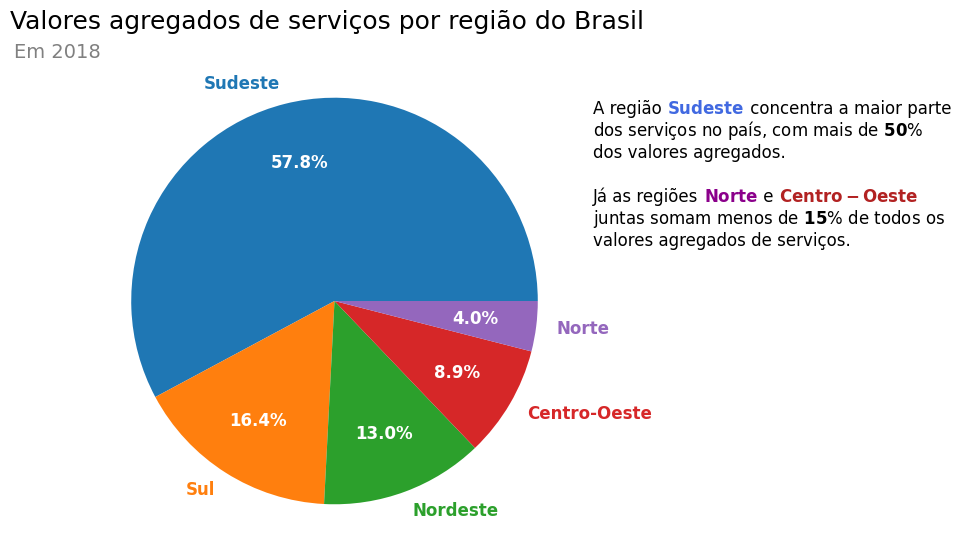

In [ ]:
#Gerando o gráfico
fig, ax = plt.subplots(figsize=(6,6))

cores = ['royalblue', 'orange', 'forestgreen', 'firebrick', 'darkmagenta']

ptc, text, _ =   ax.pie(data=df_servicos_2018, x='va_servicos', labels=df_servicos_2018.index, autopct='%1.1f%%',
       radius=1.1, pctdistance=0.7, textprops={'size':12, 'fontweight':'bold', 'color':'w'})

plt.suptitle('Valores agregados de serviços por região do Brasil', size=18, color='Black')
plt.title('Em 2018', fontsize=14, color='grey', pad=15, x=-0.1, y=0.98)

texto_colorido(
    1.4, 0.3,                                                 #coordenadas
    'A região ||$\\bf{Sudeste}$|| concentra a maior parte\n'
    'dos serviços no país, com mais de $\\bf{50}$%\n'
    'dos valores agregados.\n\n'
    'Já as regiões ||$\\bf{Norte}$|| e ||$\\bf{Centro-Oeste}$||\n'
    'juntas somam menos de $\\bf{15}$% de todos os\n'
    'valores agregados de serviços.',
    [['black', 'royalblue', 'black'],                         #linha 1
     ['black'],                                               #linha 2
     ['black'],                                               #linha 3
     ['black'],                                               #linha 4
     ['black', 'darkmagenta', 'black', 'firebrick'],          #linha 5
     ['black'],                                               #linha 6
     ['black'],                                               #linha 7
    ],
    esp=22,				                                            #espaçamento
    ax=ax,				                                            #figura onde desenhar o texto
    fontsize=12)


for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.savefig('valores_agregados_regiao.jpeg')
plt.show()

###Desafio 2: Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [ ]:
#Criando o df de 2010
df_industria_norte_2010 = df_pib.query('ano == 2010')[['regiao', 'va_industria']]

df_industria_norte_2010.loc[df_industria_norte_2010['regiao'] != 'Norte', 'regiao'] = 'Outras regiões'

df_industria_norte_2010 = df_industria_norte_2010.groupby('regiao').sum()
df_industria_norte_2010

,va_industria
regiao,
Norte,58665438171
Outras regiões,845492561850


In [ ]:
#Criando o df de 2020
df_industria_norte_2020 = df_pib.query('ano == 2020')[['regiao', 'va_industria']]

df_industria_norte_2020.loc[df_industria_norte_2020['regiao'] != 'Norte', 'regiao'] = 'Outras regiões'

df_industria_norte_2020 = df_industria_norte_2020.groupby('regiao').sum()
df_industria_norte_2020

,va_industria
regiao,
Norte,137740478879
Outras regiões,1346596521109


Text(-72, 290, '\n\n')

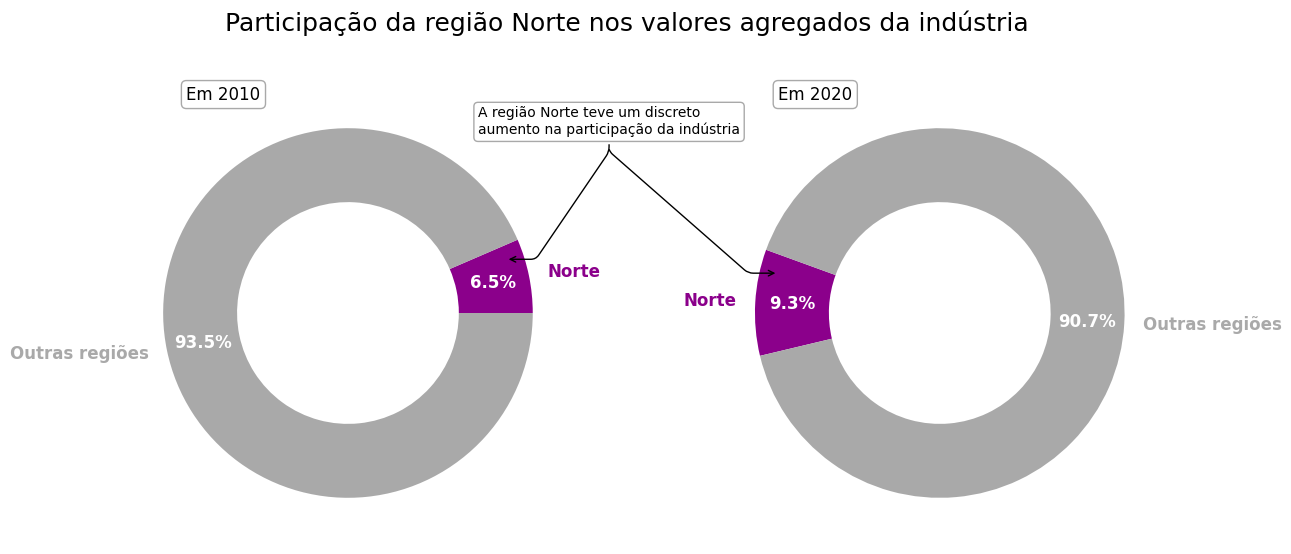

In [ ]:
#Gerando a figura para inserir os dois gráficos
fig, axs = plt.subplots(1, 2, figsize=(14,6))

#Definindo as cores do gráfico
cores = ['darkmagenta', 'darkgrey']

plt.suptitle('Participação da região Norte nos valores agregados da indústria', size=18, color='black',
             ha='center', y=1)

#Gerando gráfico de rosca relativo a 2010
ptc, text, _ = axs[0].pie(data=df_industria_norte_2010, x='va_industria', labels=df_industria_norte_2010.index, autopct=('%.1f%%'),
                      startangle=0, pctdistance=0.8, wedgeprops=dict(width=0.4),
                      textprops=dict(size=12, fontweight='bold', color='white'),
                      colors=cores)

#Título do Gráfico 1
axs[0].annotate('Em 2010', xy=(50,320), size=12, xycoords='axes points',
                bbox=dict(boxstyle='round', fc='w', ec='darkgrey'))

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

####################################################################################

#Gerando gráfico de rosca relativo a 2020
ptc, text, _ = axs[1].pie(data=df_industria_norte_2020, x='va_industria', labels=df_industria_norte_2020.index, autopct=('%.1f%%'),
                      startangle=160, pctdistance=0.8, wedgeprops=dict(width=0.4),
                      textprops=dict(size=12, fontweight='bold', color='white'),
                      colors=cores)

#Título do Gráfico 2
axs[1].annotate('Em 2020', xy=(50,320), size=12, xycoords='axes points',
                bbox=dict(boxstyle='round', fc='w', ec='darkgrey'))

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


#Anotando as conclusões
axs[0].annotate('A região Norte teve um discreto\naumento na participação da indústria',
                xy=(280,205), xycoords='axes points', xytext=(260,295), textcoords='axes points',
                bbox=dict(boxstyle='round', fc='w', ec='darkgrey'),
                size=10, arrowprops=dict(arrowstyle='->', fc='darkgrey', connectionstyle='arc, angleA=-90, angleB=0, armA=30, armB=30, rad=5'))

axs[1].annotate('\n\n', xy=(50,195),xycoords='axes points', xytext=(-72,290), textcoords='axes points',
                size=10, arrowprops=dict(arrowstyle='->', fc='darkgrey', connectionstyle='arc, angleA=-90, angleB=0, armA=30, armB=-30, rad=5'))

###Desafio 3: Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?



In [ ]:
sp_2020 = df_pib.query('sigla_uf == "SP" and ano == 2020')[['va', 'impostos_liquidos', 'pib']]
sp_2020.rename(columns={'va': 'Valor Adicionado Bruto dos bens e serviços', 'impostos_liquidos': 'Impostos Líquidos', 'pib':'PIB'}, inplace=True)
sp_2020

,Valor Adicionado Bruto dos bens e serviços,Impostos Líquidos,PIB
379,2014850308310,362788671543,2377638979835


In [ ]:
sp_2020 = sp_2020.melt(var_name='Indicadores', value_name='Valores')
sp_2020

,Indicadores,Valores
0,Valor Adicionado Bruto dos bens e serviços,2014850308310
1,Impostos Líquidos,362788671543
2,PIB,2377638979835


In [ ]:
#criando uma coluna com os valores em string e outra com as medidas
sp_2020['Valores_str'] = (sp_2020['Valores']/1e9).map('R$ {:,.2f} Bi'.format)
sp_2020['Medidas'] = ['absolute', 'relative', 'total']

sp_2020

,Indicadores,Valores,Valores_str,Medidas
0,Valor Adicionado Bruto dos bens e serviços,2014850308310,"R$ 2,014.85 Bi",absolute
1,Impostos Líquidos,362788671543,R$ 362.79 Bi,relative
2,PIB,2377638979835,"R$ 2,377.64 Bi",total


In [ ]:
#importando a biblioteca go
import plotly.graph_objects as go

#Gerando o gráfico de cascata
fig = go.Figure(go.Waterfall(name='', orientation='v', measure=sp_2020['Medidas'],
                             x=sp_2020['Indicadores'], y=sp_2020['Valores'],
                             text=sp_2020['Valores_str'], textposition='outside',
                             connector_line=dict(color='darkgrey'),
                             totals_marker=dict(color='mediumblue'),
                             increasing_marker=dict(color='mediumseagreen')
                             )
)

#Personalizando o gráfico
fig.update_layout(width=1000, height=500, font_family='DejaVu Sans', font_size=15,
                  font_color='black', title_font_color='dimgrey', title_font_size=24,
                  title_text='Composição do Produto Interno Bruto (PIB) de São Paulo em 2020' +
                              '<br><sup size=1 style="color:#555655"> Em trilhões de reais',
                  title_pad_l=50, plot_bgcolor='white', yaxis_range=[0, 290e10], hovermode='closest')

#retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

#Dados ao passar o mouse
fig.update_traces(hovertemplate='<b>%{x}</b> = %{text}')

#Adicionando a fonte de dados
fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align='left', xref='paper', yref='paper', x=1, y=-0.2, showarrow=False)

#Salvando
fig.write_html('pib_sao_paulo.html')

fig.show()

###Desafio 4: Qual a evolução anual do valor agregado de serviços na Região Nordeste entre os anos de 2016 a 2020?



In [ ]:
#Selecionando os dados
anos = [x for x in range(2016, 2021)]
nordeste = df_pib.query('regiao == "Nordeste" and ano == @anos')[['ano', 'va_servicos']]
nordeste = nordeste.groupby('ano').sum()
nordeste = nordeste.reset_index()
nordeste

,ano,va_servicos
0,2016,391149062027
1,2017,413890511671
2,2018,433449662991
3,2019,450661680677
4,2020,436102799877


In [ ]:
#Gerando uma coluna com a variação dos valores de serviço e passando o valor inicial para a primeira linha
nordeste['variacao_va'] = nordeste['va_servicos'].diff().fillna(nordeste['va_servicos']).astype('int64')

#Gerando uma coluna com as medidas para o gráfico de cascata
nordeste['Medidas'] = ['absolute'] + ['relative'] * 4

nordeste

,ano,va_servicos,variacao_va,Medidas
0,2016,391149062027,391149062027,absolute
1,2017,413890511671,22741449644,relative
2,2018,433449662991,19559151320,relative
3,2019,450661680677,17212017686,relative
4,2020,436102799877,-14558880800,relative


In [ ]:
#Gerando uma observação com a atualização da última linha com o valor total de 2020
atualizacao = pd.Series({'ano': 'Total',
                         'va_servicos': nordeste['va_servicos'].values[-1],
                         'variacao_va': nordeste['va_servicos'].values[-1],
                         'Medidas': 'total'}).to_frame().T

#Concatenando o df com a atualização e retirando a coluna va_servicos
nordeste = pd.concat([nordeste, atualizacao], axis=0, ignore_index=True)
nordeste = nordeste.drop(columns='va_servicos')

#Ajustando a formatação dos valores e renomeando as colunas
nordeste['variacao_va_str'] = (nordeste['variacao_va']/1e9).map('R$ {:,.2f} Bi'.format)
nordeste.rename(columns={'ano':'Ano', 'variacao_va':'Variação dos valores agregados de Serviço',
                         'variacao_va_str':'Variação dos valores agregados de Serviço (em texto)'},
                inplace=True)
nordeste

,Ano,Variação dos valores agregados de Serviço,Medidas,Variação dos valores agregados de Serviço (em texto)
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,Total,436102799877,total,R$ 436.10 Bi


In [ ]:
#Gerando o gráfico de cascata

fig = go.Figure(
                go.Waterfall(name='', orientation='v', measure=nordeste['Medidas'],
                             y=nordeste['Variação dos valores agregados de Serviço'],
                             text=nordeste['Variação dos valores agregados de Serviço (em texto)'],
                             textposition='outside',
                             connector_line=dict(color='dimgray'),
                             totals_marker=dict(color='royalblue'),
                             increasing_marker=dict(color='seagreen'),
                             decreasing_marker=dict(color='darkred')
                             )
                )

#Personalizando o gráfico
fig.update_layout(width=1100, height=500, font_family='DejaVu Sans', font_size=15,
                  font_color='black', title_font_color='black', title_font_size=24,
                  title_text='Variação dos Valores Agregados de Serviço na região Nordeste'+
                  '<br><sup size=1 style="color:#555655">De 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor='white', yaxis_range=[0, 500e9])

#Removendo os ticks do eixo y
fig.update_yaxes(showticklabels=False)

#Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=nordeste['Ano'])

#Dados ao passar o mouse
fig.update_traces(hovertemplate='<b>%{x}</b> = %{text}')

#Anotação
fig.add_annotation(text='A <b>região Nordeste</b> apresentou recuo apenas<br>uma vez no período, no ano de 2020',
                   align='left', axref='x', ayref='y', x=4, y=400e9, ax=3.2, ay=200e9,
                   arrowhead=1, arrowside='start', showarrow=True, arrowwidth=2, arrowcolor='grey',
                   bordercolor='gray', borderwidth=1, borderpad=4)

fig.write_html('valor_agregado_servicos_nordeste.html')
fig.show()

###Desafio 5: Como está composto, em valores absolutos, o PIB por região dos 4 últimos anos do conjunto de dados (2017 a 2020)?



In [ ]:
#Selecionando os dados
anos = [x for x in range(2017,2021)]
pib_regioes = df_pib.query('ano == @anos')[['ano', 'regiao', 'pib']]
pib_regioes['pib'] = (pib_regioes['pib']/1e12).round(2)
pib_regioes = pib_regioes.reset_index(drop=True)
pib_regioes

,ano,regiao,pib
0,2017,Norte,0.04
1,2018,Norte,0.04
2,2019,Norte,0.05
3,2020,Norte,0.05
4,2017,Norte,0.01
...,...,...,...
103,2020,Centro-Oeste,0.22
104,2017,Centro-Oeste,0.24
105,2018,Centro-Oeste,0.25
106,2019,Centro-Oeste,0.27


In [ ]:
#Criando uma tabela cruzada com os valores de pib
pib_regioes_cross = pd.crosstab(index=pib_regioes.ano, columns=pib_regioes.regiao,
                                values=pib_regioes.pib, aggfunc='sum')
pib_regioes_cross = pib_regioes_cross[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
pib_regioes_cross = pib_regioes_cross.reset_index()
pib_regioes_cross

regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


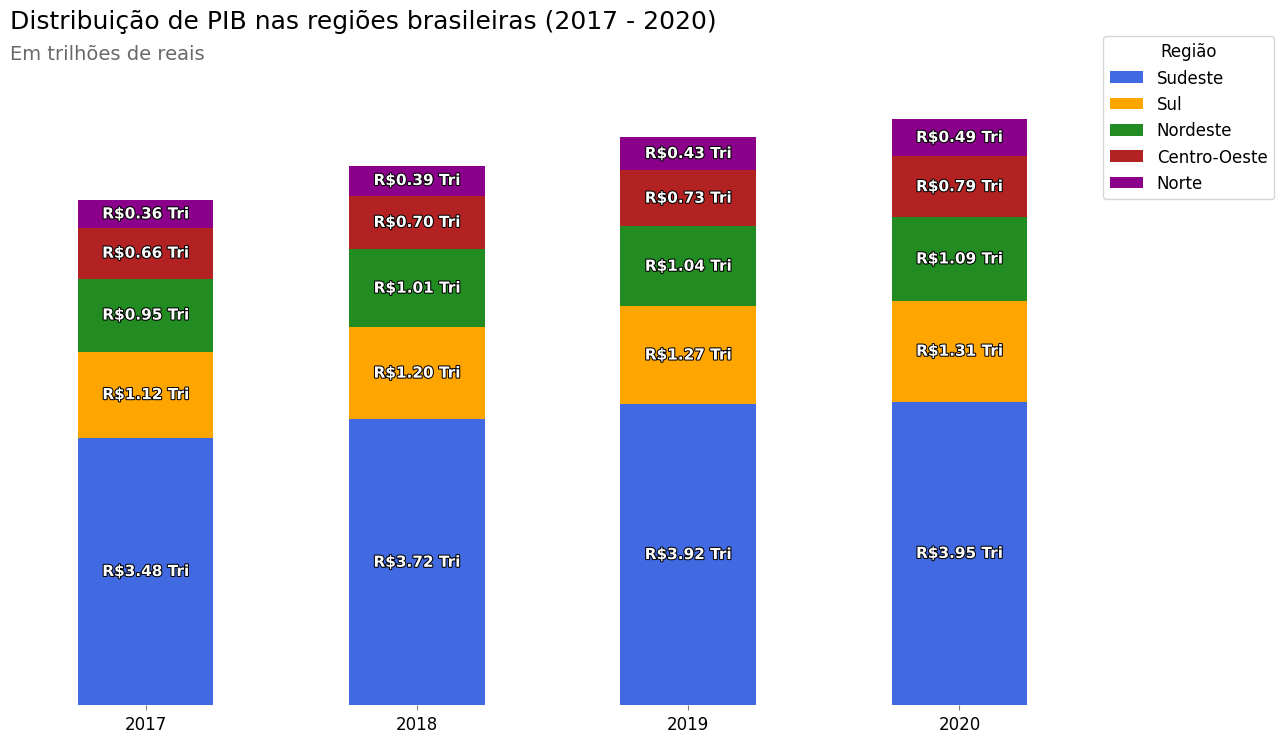

In [ ]:
import matplotlib.patheffects as path_effects
#Gerando o gráfico

fig, ax = plt.subplots(figsize=(14,8))

#Definindo as cores do gráfico
cores = ['royalblue', 'orange', 'forestgreen', 'firebrick', 'darkmagenta']

#Personalizando o titulo superior
fig.suptitle('Distribuição de PIB nas regiões brasileiras (2017 - 2020)', fontsize=18, color='black', ha='right', x=0.63, y=.98)

#Criando o gráfico
pib_regioes_cross.plot(x='ano', kind='bar', stacked=True, ax=ax, color=cores)

#personalizando o gráfico
ax.set_title('Em trilhões de reais\n', color='dimgray', loc='left', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12, color='grey', labelrotation=0)
ax.yaxis.set_tick_params(color='white')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.legend(bbox_to_anchor=(1,1.1), title='Região', title_fontsize=12, fontsize=12)

for container in ax.containers:
  labels = [f'R${valor.get_height():.2f} Tri' for valor in container]
  texts = ax.bar_label(container, label_type='center', labels=labels, size=11, color='white', fontweight='bold')

  for text in texts:
      text.set_path_effects([
          path_effects.Stroke(linewidth=1.5, foreground='black'),
          path_effects.Normal()
      ])


plt.show()

###Desafio 6: Como está composto os valores agregados brutos dos bens e serviços (em valor absoluto) em relação aos Estados da região Centro-Oeste no ano de 2020?



In [ ]:
#Selecionando os dados necessários
df_centro_oeste = df_pib.copy()
df_centro_oeste = df_pib.query('regiao == "Centro-Oeste" and ano == 2020')[['sigla_uf', 'va_servicos', 'va_industria',
                                                                            'va_adespss', 'va_agropecuaria']]
df_centro_oeste = df_centro_oeste.sort_values('va_servicos', ascending=True)
df_centro_oeste = df_centro_oeste.set_index('sigla_uf')

df_centro_oeste.head()

,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


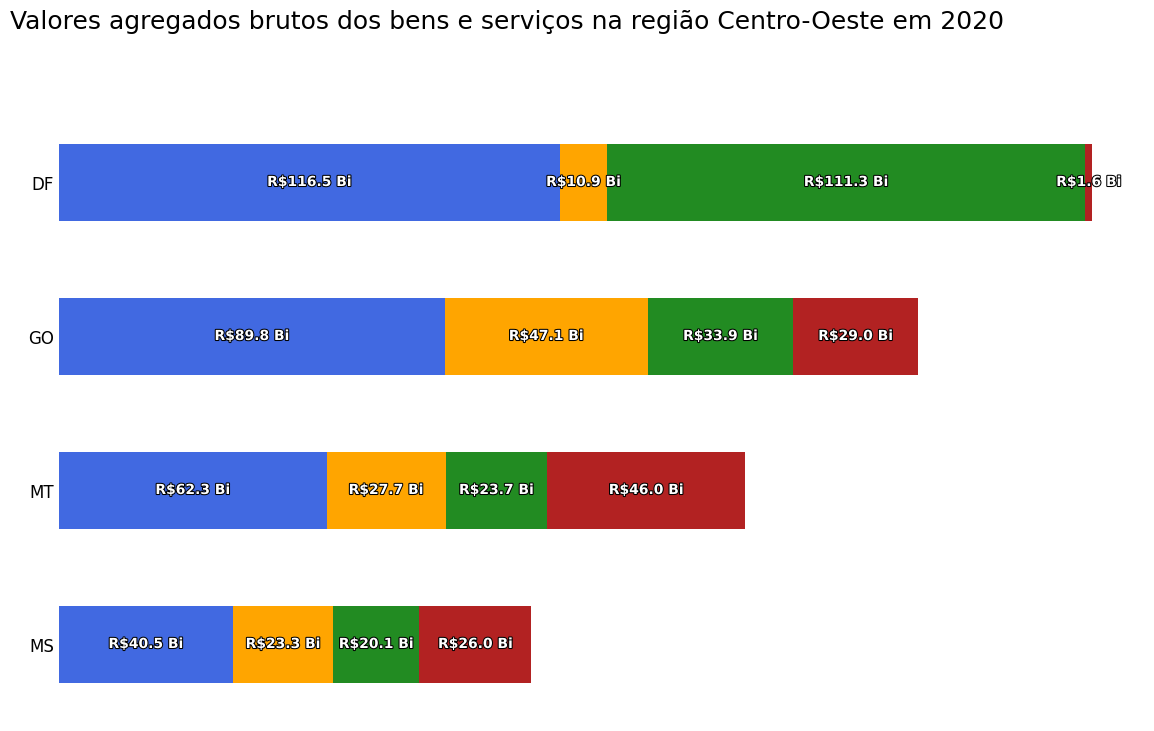

In [ ]:
import matplotlib.patheffects as path_effects

def grafico_va():

  #Área do gráfico
  fig, ax = plt.subplots(figsize=(14,8))

  #Definindo as cores do gráfico
  cores = ['royalblue', 'orange', 'forestgreen', 'firebrick']

  #Gerando o gráfico de barras empilhadas
  df_centro_oeste.plot(kind='barh', stacked=True, color=cores, ax=ax)

  #Personalizando o gráfico
  plt.suptitle('Valores agregados brutos dos bens e serviços na região Centro-Oeste em 2020', size=18, color='black',
               ha='right', x=0.8, y=1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.yaxis.set_tick_params(labelsize=12, labelcolor='black', length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.set_xticklabels([])
  ax.legend().remove()
  ax.set_frame_on(False)

  #Valores nas barras
  for container in ax.containers:
    labels = [f'R${valor.get_width()/1e9:.1f} Bi' for valor in container]
    texts = ax.bar_label(container, label_type='center', labels=labels, size=10, color='white', fontweight='bold')

    for text in texts:
      text.set_path_effects([
          path_effects.Stroke(linewidth=1.5, foreground='black'),
          path_effects.Normal()
      ])

  return ax, cores

ax = grafico_va()

In [ ]:
from matplotlib import transforms

#Função para colorir o texto
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

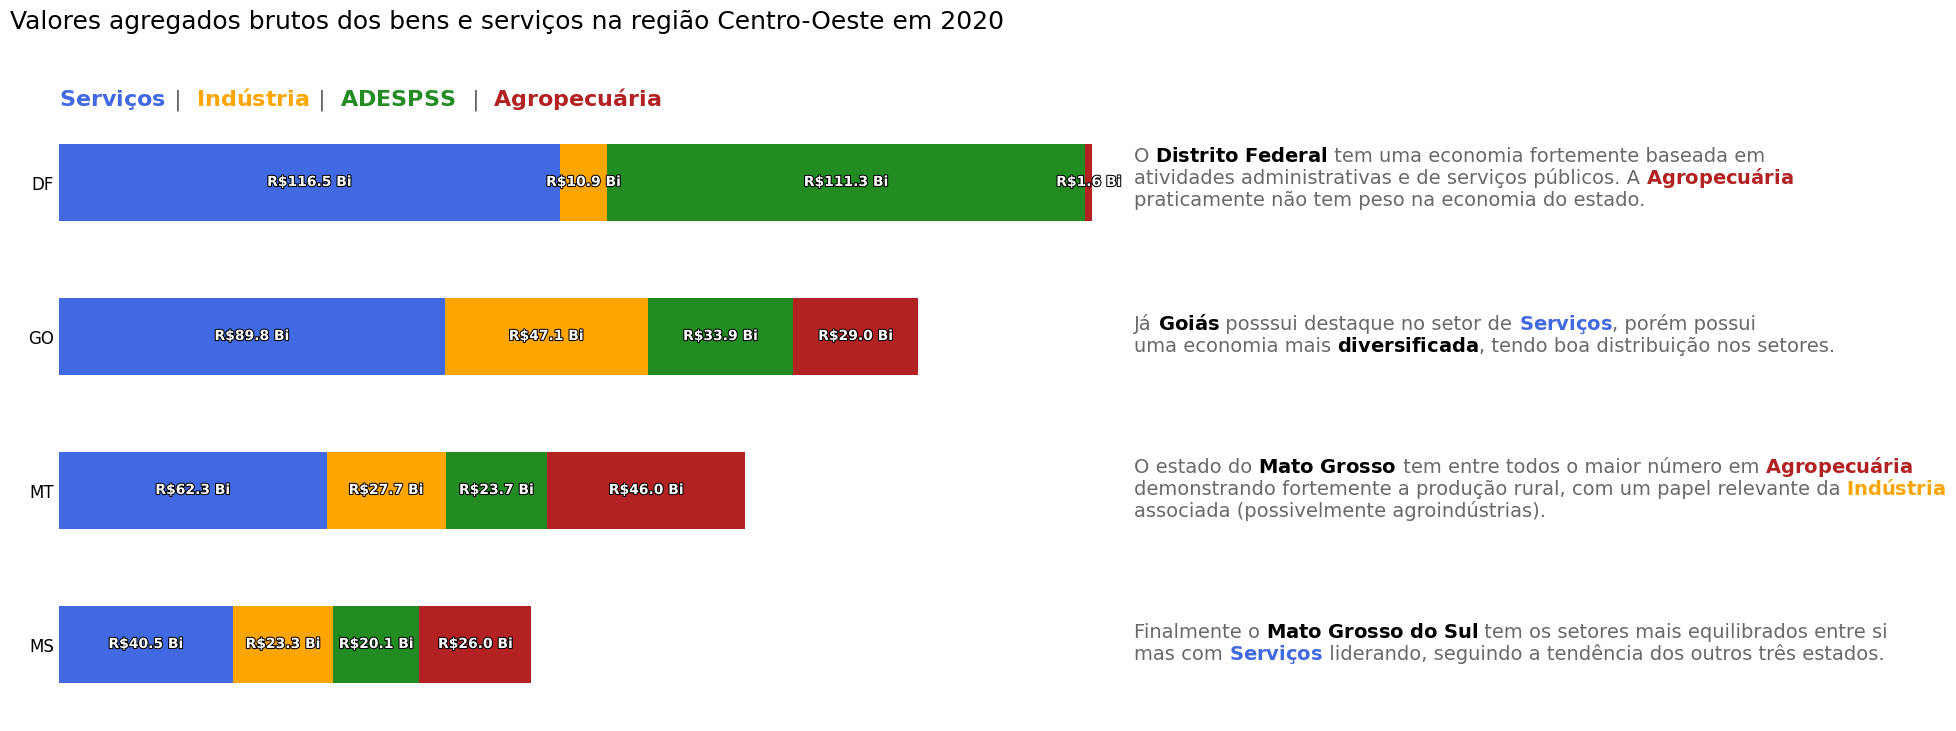

In [ ]:
#Gerando o gráfico de barras empilhadas
ax, cores = grafico_va()

#Trabalhando com o texto colorido para legendas e anotações
texto_colorido(0, 3.5, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$  || | || $\\bf{Agropecuária}$',
               cores=[[cores[0], 'dimgrey', cores[1], 'dimgrey', cores[2], 'dimgrey', cores[3]]], ax=ax, fontsize=16)

# Anotando uma conclusão no gráfico
texto_colorido(250e9, 2.85,
               'O ||$\\bf{Distrito\ Federal}$|| tem uma economia fortemente baseada em\n'
               'atividades administrativas e de serviços públicos. A ||$\\bf{Agropecuária}$||\n'
               'praticamente não tem peso na economia do estado.',
               [['dimgrey', 'black', 'dimgrey'],
                ['dimgrey', cores[3]],
                ['dimgrey']
                ],
               esp=22,
               ax=ax,
               fontsize=14)

texto_colorido(250e9, 1.9,
               'Já ||$\\bf{Goiás}$|| posssui destaque no setor de ||$\\bf{Serviços}$||, porém possui\n'
               'uma economia mais ||$\\bf{diversificada}$||, tendo boa distribuição nos setores.',
               [['dimgrey', 'black', 'dimgrey', cores[0], 'dimgrey'],
                ['dimgrey', 'black', 'dimgrey']
                ],
               esp=22,
               ax=ax,
               fontsize=14)

texto_colorido(250e9, 0.83,
               'O estado do ||$\\bf{Mato\ Grosso}$|| tem entre todos o maior número em ||$\\bf{Agropecuária}$||\n'
               'demonstrando fortemente a produção rural, com um papel relevante da ||$\\bf{Indústria}$||\n'
               'associada (possivelmente agroindústrias).',
               [['dimgrey', 'black', 'dimgrey', cores[3]],
                ['dimgrey', cores[1]],
                ['dimgrey']
                ],
               esp=22,
               ax=ax,
               fontsize=14)


texto_colorido(250e9, -0.1,
               'Finalmente o ||$\\bf{Mato\ Grosso\ do\ Sul}$|| tem os setores mais equilibrados entre si\n'
               'mas com ||$\\bf{Serviços}$|| liderando, seguindo a tendência dos outros três estados.',
               [['dimgrey', 'black', 'dimgrey'],
                ['dimgrey', cores[0], 'dimgrey']
                ],
               esp=22,
               ax=ax,
               fontsize=14)